In [1]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
from rolling import make_rolling_footprints
from lsst.sims.featureScheduler.utils import standard_goals, Footprint
from lsst.sims.utils import raDec2Hpid

In [2]:
nside=32
mjd_start=5500
sun_RA_start = 0. #np.pi/2
nslice=2
scale=0.9

In [3]:
footprints = make_rolling_footprints(mjd_start=mjd_start,
                                         sun_RA_start=sun_RA_start, nslice=nslice, scale=scale,
                                         nside=nside)

/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/li

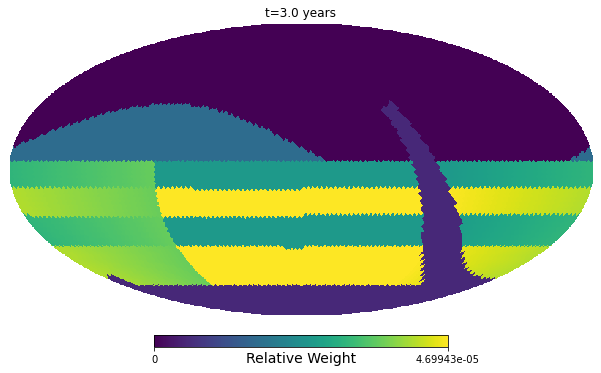

In [4]:
offset=365.25*3
fp = footprints(mjd_start+offset)
hp.mollview(fp['r'], title="t=%.1f years" % (offset/365.25), unit='Relative Weight')

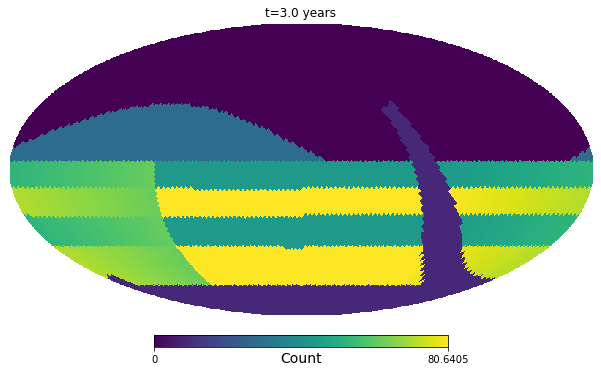

In [5]:
fp = footprints.estimate_counts(mjd_start+offset, nvisits=offset/3652*2e6)
hp.mollview(fp['r'], title="t=%.1f years" % (offset/365.25), unit='Count')

In [6]:
footprints_hp = standard_goals(nside=nside)
footprints_standard = Footprint(mjd_start, sun_RA_start=sun_RA_start, nside=nside)
for i, key in enumerate(footprints_hp):
    footprints_standard.footprints[i, :] = footprints_hp[key]

In [7]:
nights = np.arange(1,365.25*8.5, 365.25/3)

<ipython-input-8-d7fa6f586105>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


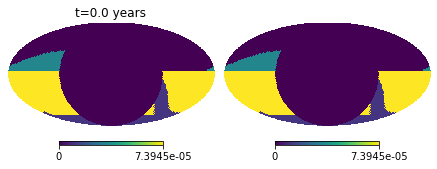

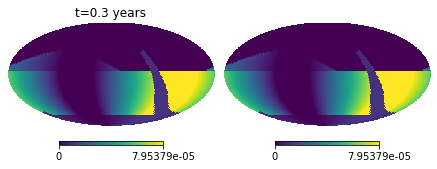

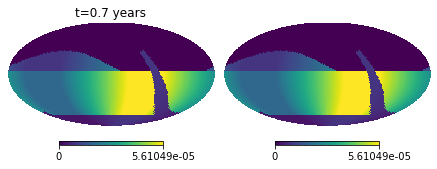

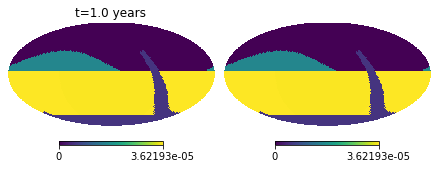

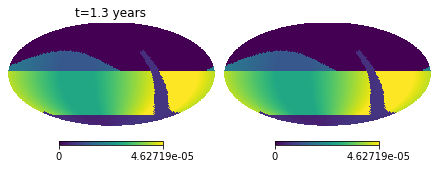

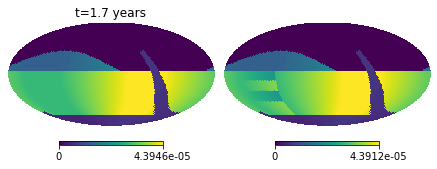

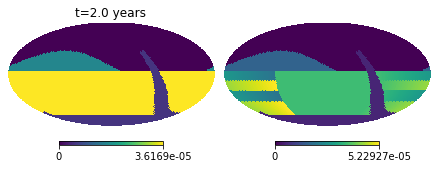

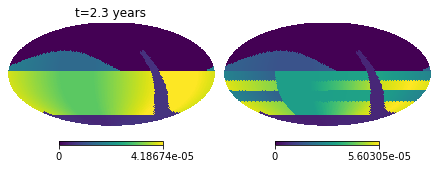

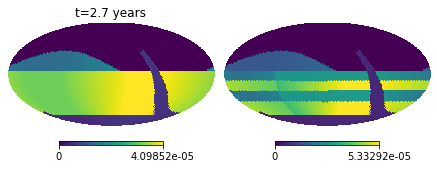

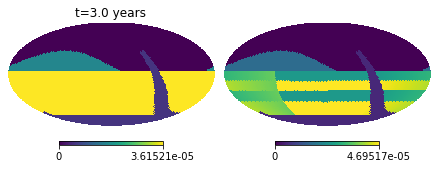

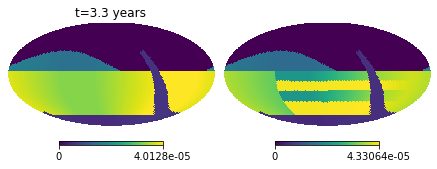

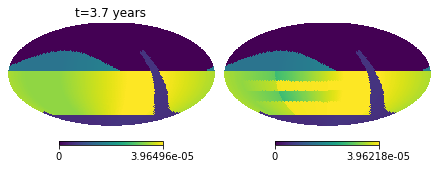

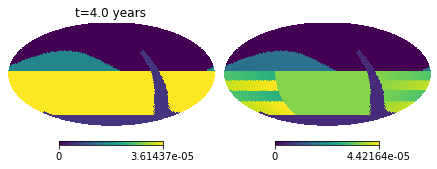

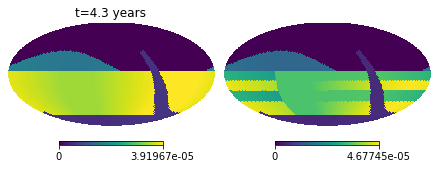

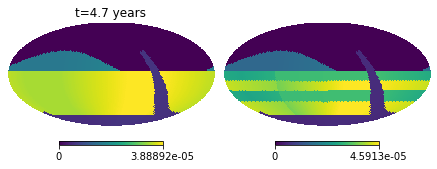

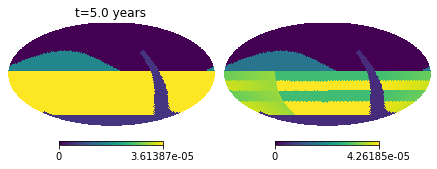

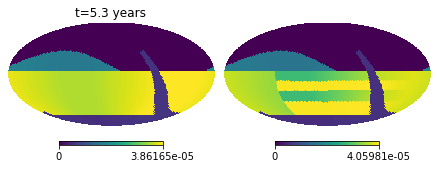

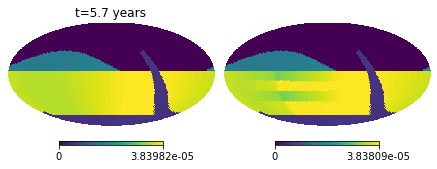

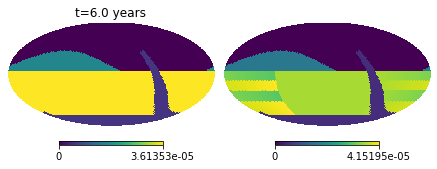

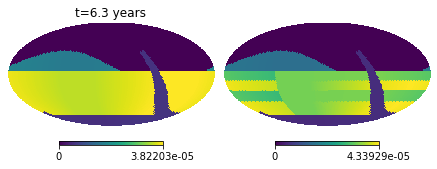

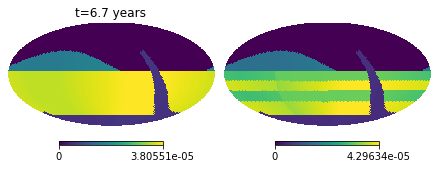

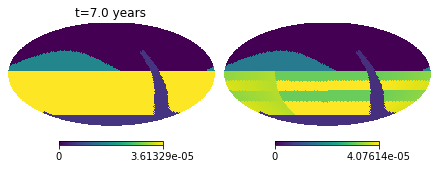

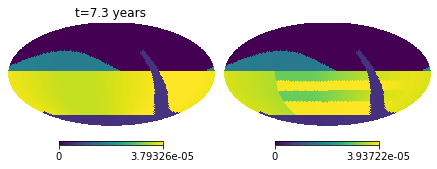

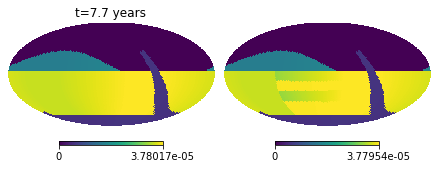

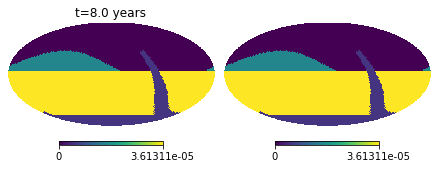

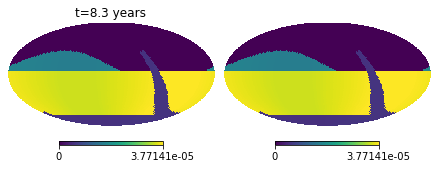

In [8]:
for night in nights:
    fp = footprints(mjd_start+night)
    fp_stand = footprints_standard(mjd_start+night)
    plt.figure()
    hp.mollview(fp_stand['r'], sub=(1,2,1), #/fp_stand['r'].max()
               title="t=%.1f years" % (night/365.25))
    
    hp.mollview(fp['r'], title='', #/fp['r'].max()
                unit='', sub=(1,2,2))
    

<ipython-input-9-b4f5e9c00114>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


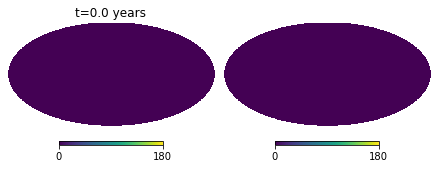

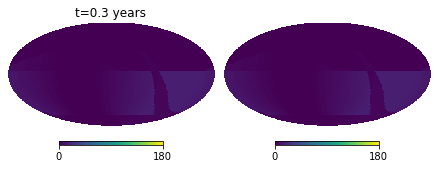

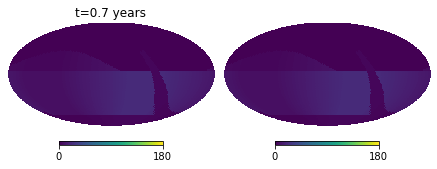

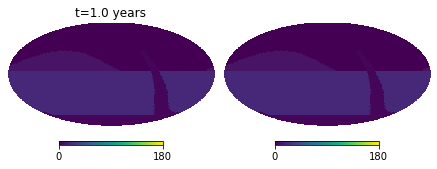

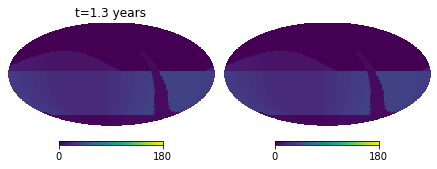

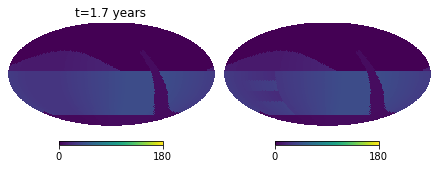

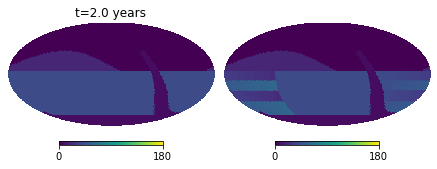

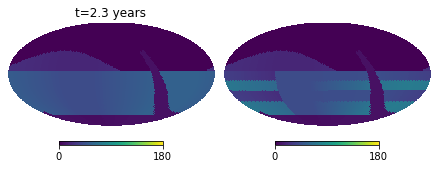

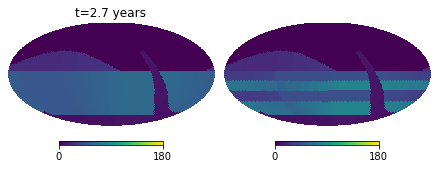

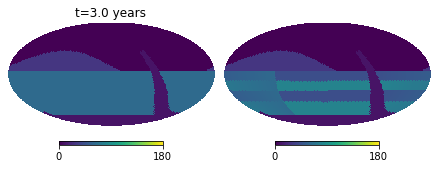

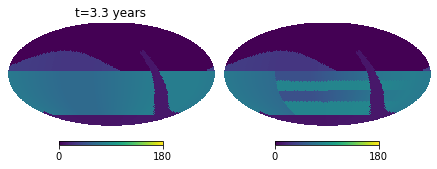

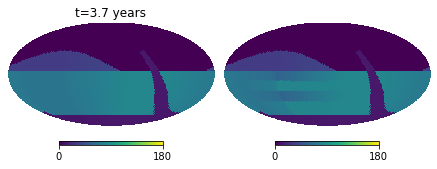

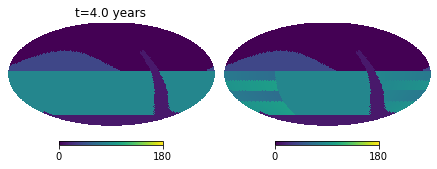

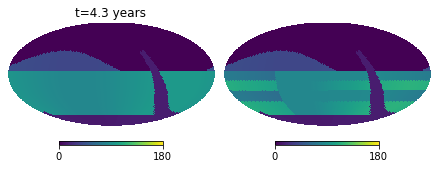

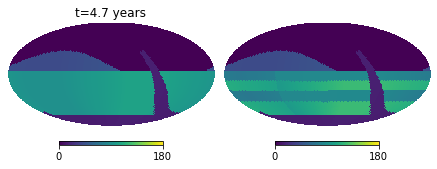

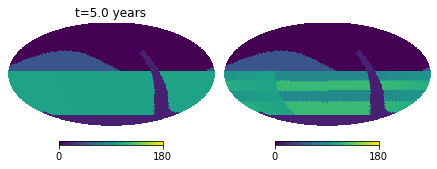

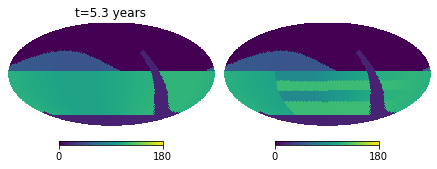

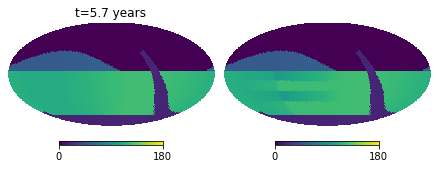

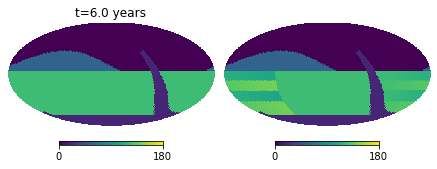

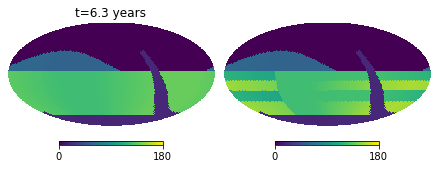

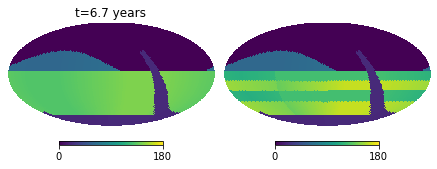

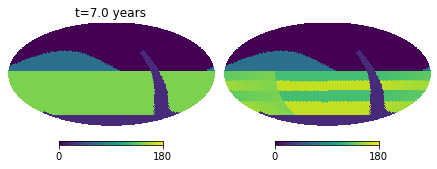

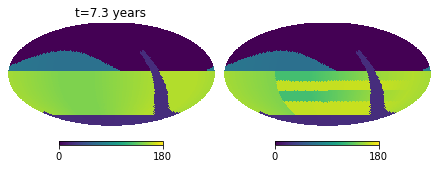

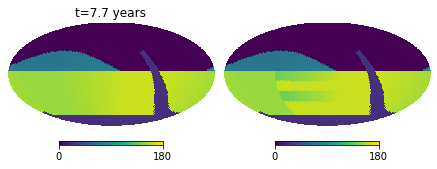

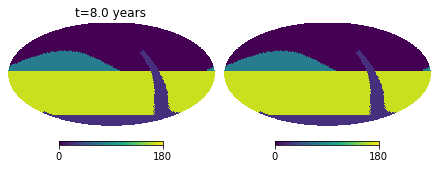

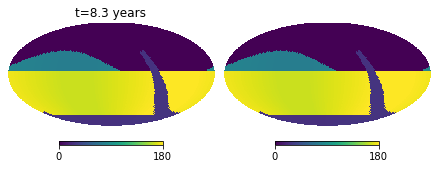

In [9]:
nv_tot=2e6
day_tot=3652.2
cmax=180
cmin=0
for night in nights:
    fp = footprints.estimate_counts(mjd_start+night, nvisits=nv_tot/day_tot*night)
    fp_stand = footprints_standard.estimate_counts(mjd_start+night, nvisits=nv_tot/day_tot*night)
    plt.figure()
    hp.mollview(fp_stand['r'], sub=(1,2,1), #/fp_stand['r'].max()
               title="t=%.1f years" % (night/365.25),max=cmax,min=cmin)
    
    #fp = footprints(mjd_start+night)
    hp.mollview(fp['r'], title='', #/fp['r'].max()
                unit='', sub=(1,2,2),max=cmax,min=cmin)

In [28]:
# Let's look at one spot on the sky for 2 years
ra = 0
dec = -20.
mjds = np.arange(0,365.25*2, 1)

indx = raDec2Hpid(nside,ra, dec)

fp_val = []
for mjd in mjds:
    fp = footprints.estimate_counts(mjd_start+mjd, nvisits=nv_tot/day_tot*mjd)
    fp_val.append(fp['r'][indx])

Text(0.5, 1.0, 'at RA=0, dec=-20')

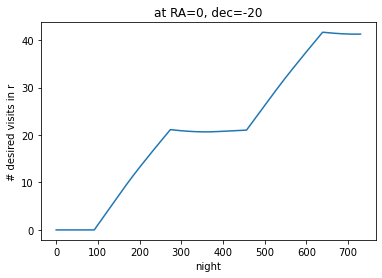

In [29]:
plt.plot(mjds, fp_val)
plt.xlabel('night')
plt.ylabel('# desired visits in r')
plt.title('at RA=%i, dec=%i' %(ra, dec))